In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import matplotlib.pyplot as plt
sys.path.append("../src/plotting/")
import asym_plotter
import dataloader

# Plot Single

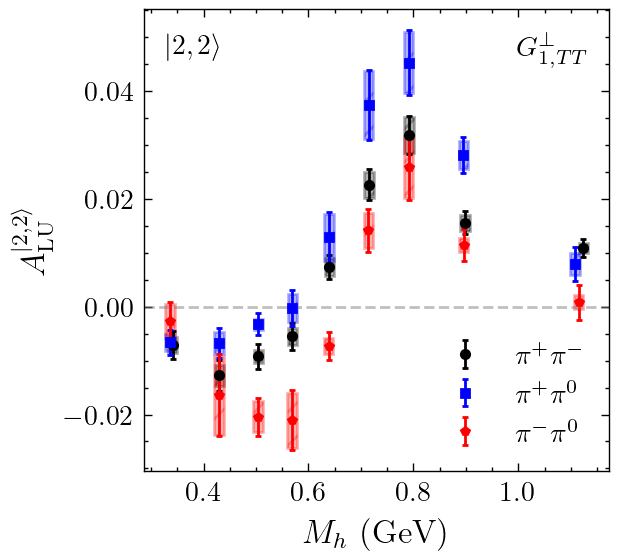

In [9]:
path = "../out/full_v0/asymmetry_results.yaml"
data = dataloader.loadFromYamlPath(path)
pairs = [{"pair":"piplus_piminus"},
         {"pair":"piplus_pi0"},
         {"pair":"piminus_pi0"}]
fig,ax = plt.subplots(1,1,dpi=200,figsize=(3,3))
asym_plotter.fetchAx(yamlData=data, L=2, M=2, twist=2, series_specs=pairs, ax=ax, show_sys_band=True)
plt.show()

# Plot Single w/ Sys

(<Figure size 800x1000 with 2 Axes>,
 (<Axes: xlabel='$M_{h}\\ (\\mathrm{GeV})$', ylabel='$A_{\\mathrm{LU}}^{|2,2\\rangle}$'>,
  <Axes: ylabel='$\\Delta A$'>))

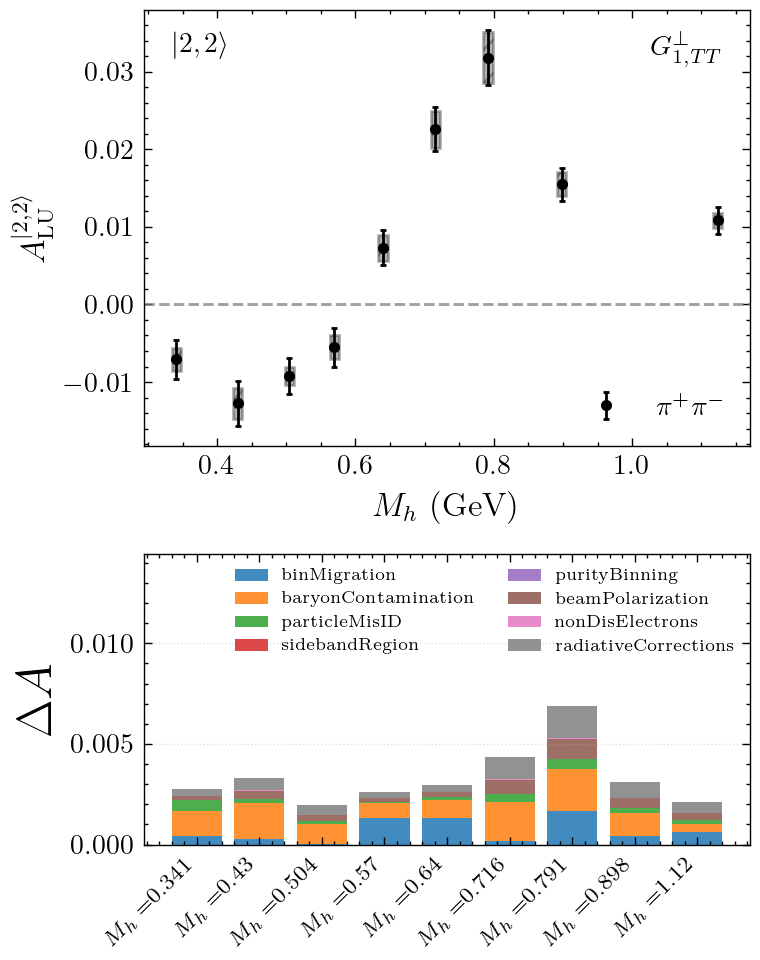

In [12]:
path = "../out/full_v0/asymmetry_results.yaml"
data = dataloader.loadFromYamlPath(path)

asym_plotter.plotSysFig(yamlData=data, L=2, M=2, twist=2, pair="piplus_piminus", show_sys_band=True)

(<Figure size 800x1000 with 2 Axes>,
 (<Axes: xlabel='$M_{h}\\ (\\mathrm{GeV})$', ylabel='$A_{\\mathrm{LU}}^{|2,2\\rangle}$'>,
  <Axes: ylabel='$\\Delta A$'>))

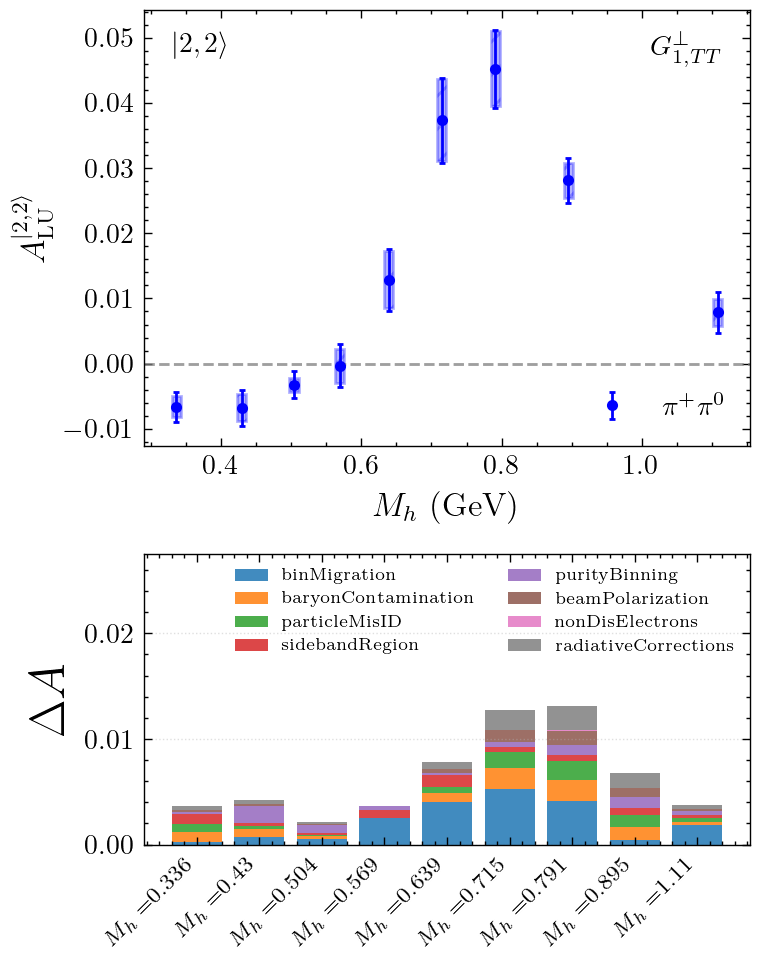

In [13]:
path = "../out/full_v0/asymmetry_results.yaml"
data = dataloader.loadFromYamlPath(path)

asym_plotter.plotSysFig(yamlData=data, L=2, M=2, twist=2, pair="piplus_pi0", show_sys_band=True)

In [ ]:
path = "../out/full_v0/asymmetry_results.yaml"
data = dataloader.loadFromYamlPath(path)

fig = asym_plotter.plot_grid(data, 'piplus_piminus', 3, bin_var='Mh', grid=True,show_sys_band=True)
plt.show()